# Pengaruh Query Pencarian Dan Riwayat Tontonan Pada Video Yang Muncul Di Home Page Youtube Yang Berasal Dari Channel Yang Tidak Disubscribe Dan Ditonton

## Latar Belakang
YouTube merupakan platform video terbesar di dunia dengan lebih dari 2 miliar pengguna aktif. Setiap hari, pengguna YouTube menonton miliaran jam video. Homepage YouTube merupakan halaman pertama yang dilihat pengguna ketika mereka membuka aplikasi YouTube. Video yang muncul di homepage memiliki peluang lebih tinggi untuk ditonton oleh banyak orang.

Banyak kreator YouTube yang ingin videonya muncul di homepage. Hal ini karena video yang muncul di homepage memiliki peluang lebih tinggi untuk ditonton oleh banyak orang. Oleh karena itu, penting bagi kreator YouTube untuk mengetahui strategi menjangkau penonton baru YouTube melalui homepage jika penonton tersebut belum pernah menonton video dari channel youtube dan belum melakukan *subscribing* pada channel milik konten kreator tersebut.

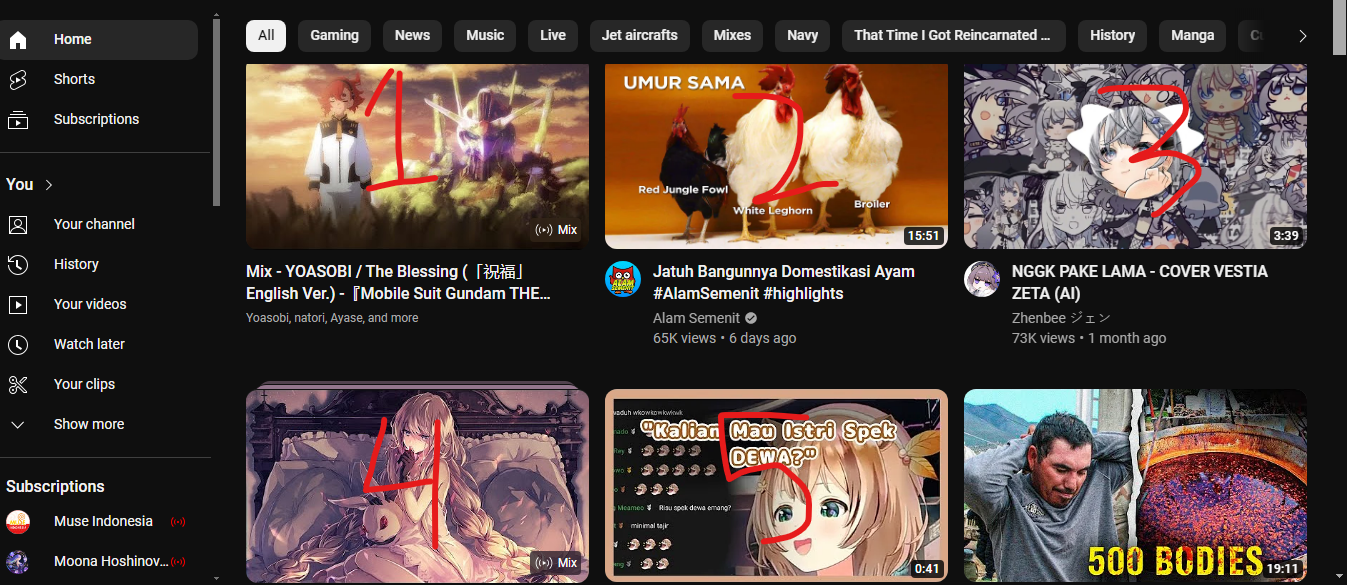

## Rumusan Masalah
- Apa saja faktor yang mempengaruhi peluang video muncul di homepage penonton YouTube?
- Bagaimana cara mengoptimalkan video YouTube agar peluangnya muncul di homepage penonton lebih tinggi?

## Importing Library
library yang digunakan:
- pandas -> manipulasi data.
- numpy -> manipulasi data.
- matplotlib.pyplot -> visualisasi data.
- seaborn -> visualisasi data.
- re -> mengambil data berpola.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

## Data Loading
data digunakan:
- data video yang muncul pada homepage dan diambil sebanyak 68 kali pengambilan pada waktu yang sama.
- data video yang pernah ditonton kecuali video ads.
- data channel yang disubscribe.
- data history pencarian pada youtube.

In [50]:
file_path = 'C:/Users/snsv/Documents/Data Analyst/personal youtube analysis/data/preprocessed'
df_sub = pd.read_csv(f'{file_path}/subscriptions.csv')
df_video = pd.read_csv(f'{file_path}/home_video.csv')
df_watch = pd.read_csv(f'{file_path}/watch_history.csv')
df_search = pd.read_csv(f'{file_path}/search_history.csv')

## Data Preview

### Data channel yang di subscribe oleh penulis
Data channel yang di subscribe penulis disimpan sebagai 'df_sub', dengan rincian sebagai berikut Kolom:
- 'Channel Id' : ID youtube channel.
- 'Channel Url' : URL youtube untuk channel.
- 'Channel Title' : Nama Channel

In [51]:
df_sub.head(5)

,Channel Id,Channel Url,Channel Title
0,UCADZVxC_4omYiNDLcsDoCeg,http://www.youtube.com/channel/UCADZVxC_4omYiN...,Londokampung
1,UCYk4LJI0Pr6RBDWowMm-KUw,http://www.youtube.com/channel/UCYk4LJI0Pr6RBD...,Deddy Corbuzier
2,UCahetHoMuR0j0EKLogexCIg,http://www.youtube.com/channel/UCahetHoMuR0j0E...,ShinMei
3,UCfQHaUbD0oEBH_FRYHE5qIg,http://www.youtube.com/channel/UCfQHaUbD0oEBH_...,Sepulang Sekolah
4,UCjQhd1APsd5NQhiVZV7GYzg,http://www.youtube.com/channel/UCjQhd1APsd5NQh...,Sabaton


### Data riwayat pencarian penulis.
Data riwayat 'kata kunci/query' yang pernah dicari oleh penulis, dengan rincian kolom sebagai berikut:
- 'title' : Nama aktivitas yang dilakukan penulis.
- 'titleUrl' : URL yang digunakan youtube untuk pencarian kata kunci.
- 'time' : Waktu saat penulis mencari kata kunci.
- 'query' : kata kunci yang dicari oleh penulis.
- 'time_truncate' : sama seperti kolom 'time' tetapi hanya tanggal sebagai satuan terkecilnya.


In [52]:
df_search['time'] = pd.to_datetime(df_search['time'])
df_search['time_truncate'] = df_search['time'].dt.floor('D')
df_search['time_truncate'] = df_search['time_truncate'].apply(lambda x: str(x)[:10])
df_search.head(5)

,title,titleUrl,time,query,time_truncate
0,dr stephanie,https://www.youtube.com/results?search_query=d...,2024-03-18 08:15:18.123000+00:00,"['dr', 'stephanie']",2024-03-18
1,tensorflow,https://www.youtube.com/results?search_query=t...,2024-03-18 08:13:48.228000+00:00,['tensorflow'],2024-03-18
2,tensorflow,https://www.youtube.com/results?search_query=t...,2024-03-17 20:43:54.674000+00:00,['tensorflow'],2024-03-17
3,machine learning indonesia,https://www.youtube.com/results?search_query=m...,2024-03-17 20:43:39.292000+00:00,"['machine', 'learning', 'indonesia']",2024-03-17
4,kaca biru,https://www.youtube.com/results?search_query=k...,2024-03-13 15:09:56.510000+00:00,"['kaca', 'biru']",2024-03-13


### Data video yang di tonton oleh penulis
Data riwayat video yang pernah ditonton oleh penulis, dengan rincian kolom sebagai berikut:
- 'title' : Judul Video.
- 'titleUrl' : URL yang digunakan youtube untuk menonton tiap video.
- 'time' : Waktu saat penulis menonton video.
- 'video_id' : ID video yang terdaftar pada youtube.
- 'channel_name' : nama channel yang terdaftar pada youtube.
- 'channel_id' : ID channel yang terdaftar pada youtube.
- 'time_truncate' : sama seperti kolom 'time' tetapi hanya tanggal sebagai satuan terkecilnya.
- 'video_tag' : meta tag yang digunakan oleh video

In [53]:
df_watch['time'] = pd.to_datetime(df_watch['time'])
df_watch['time_truncate'] = df_watch['time'].dt.floor('D')
df_watch['time_truncate'] = df_watch['time_truncate'].apply(lambda x: str(x)[:10])
df_watch['title'] = df_watch['title'].apply(lambda x: x[8:])
df_watch.head(5)

,title,titleUrl,time,channel_name,channel_id,video_id,video_tag,time_truncate
0,Honestly! I felt bad for killing these shadows...,https://www.youtube.com/watch?v=lJ48Z86T_rw,2024-03-18 15:29:04.430000+00:00,STONE XD,UCSaDiRN6Z8owFIgqd0pkDDQ,lJ48Z86T_rw,"['STONE XD', 'Ghost', 'Call of duty', 'Edit', ...",2024-03-18
1,My guy did NOT put a second thought 💀 (Shangri...,https://www.youtube.com/watch?v=Y6Phjjl9Qvk,2024-03-18 15:28:35.232000+00:00,harissm,UC6bi-o0gusnxQK7W5B85dHQ,Y6Phjjl9Qvk,"['HARISSM', 'shangri-la frontier', 'shangri-la...",2024-03-18
2,The BRAT who flipped her SKIRT 80 years ago 💀 ...,https://www.youtube.com/watch?v=T33Bfgg2wUc,2024-03-18 15:28:33.438000+00:00,harissm,UC6bi-o0gusnxQK7W5B85dHQ,T33Bfgg2wUc,"['HARISSM', 'Sousou no frieren', 'sousou no fr...",2024-03-18
3,Mau Random Bentar!,https://www.youtube.com/watch?v=cIbwFCdWDYk,2024-03-18 15:27:32.664000+00:00,ShinMei,UCahetHoMuR0j0EKLogexCIg,cIbwFCdWDYk,NaN,2024-03-18
4,if this is your POV as the 4th person in this ...,https://www.youtube.com/watch?v=e1ayKkSLdFY,2024-03-18 15:10:36.562000+00:00,English Subs & Dubs,UCXjvMknkTMIzE-Xzw2xzI1Q,e1ayKkSLdFY,"['romance anime', 'oushi heartbroken', 'painfu...",2024-03-18


### Data video yang muncul pada home page penulis
Data video yang muncul pada home page penulis dalam 68 kali pengambilan sample, denga  rincian kolom sebagai berikut:
- 'video_id' : ID video youtube
- 'video_title' : Judul video youtube
- 'view_count' : Jumlah views
- 'channel_name' : Nama channel
- 'channel_id' : ID channel
- 'channel_url' : URL channel
- 'time_record' : Waktu pengambilan sample
- 'video_tag' : Meta tag video

In [54]:
df_video.head(5)

,video_id,video_title,view_count,channel_name,channel_id,channel_url,time_record,video_tag
0,cIbwFCdWDYk,Mau Random Bentar!,0,ShinMei,UCahetHoMuR0j0EKLogexCIg,/@ShinMeii,2024-03-18 23:32:23.757362,NaN
1,vZ96jD3jh1Q,Kenapa Eropa Pro LGBT banget? Padahal Dulu Pal...,71344,Sepulang Sekolah,UCfQHaUbD0oEBH_FRYHE5qIg,/@SepulangSekolah,2024-03-18 23:32:23.757362,"'sepulang', 'sekolah', 'koi', 'jui', 'SMA', 'p..."
2,1h1w876eIAo,MENDING AZKA KATOLIK SELAMANYA DARIPADA DEKET ...,540339,Deddy Corbuzier,UCYk4LJI0Pr6RBDWowMm-KUw,/@corbuzier,2024-03-18 23:32:23.757362,"'Login', 'Log', 'in', 'Habib', 'Jafar', 'Onad'..."
3,BkN_K-Px-Kw,The Wellerman Song and Drunken Sailor - Stormy...,265,Fenrir Music,UC-SR4l7G-X1Q_5e18QE1Wpg,/@FenrirAudioVisual,2024-03-18 23:32:23.757362,"'wellerman', 'drunken', 'sailor', 'sea', 'shan..."
4,6Zy-bJmSwS4,Kehidupan ke-7 Nona Antagonis - Episode 11 [Ta...,184120,Muse Indonesia,UCxxnxya_32jcKj4yN1_kD7A,/@MuseIndonesia,2024-03-18 23:32:23.757362,"'ルプなな', '7thloop', 'villainess', 'fantasi', 'r..."


## Exploratory

### Status Subscribing Video

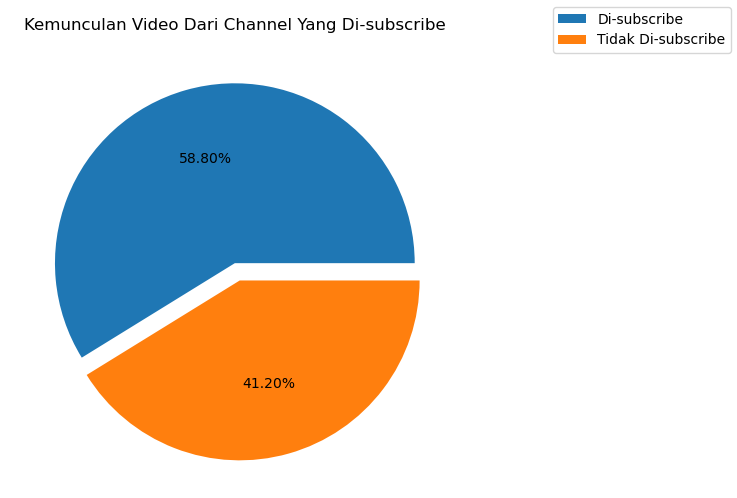

In [55]:
df_video['is_subscribe'] = df_video['channel_id'].apply(lambda x: 'Di-subscribe' if x in (df_sub['Channel Id'].to_list()) else 'Tidak Di-subscribe')

temp_df = pd.DataFrame(df_video[['is_subscribe']].value_counts()).reset_index()

temp_df['percentage'] = round(temp_df['count']/temp_df['count'].sum() *100,2)

explode = (0, 0.1)
fig, ax = plt.subplots(figsize=(10,5))
plt.title("Kemunculan Video Dari Channel Yang Di-subscribe")
ax.pie(temp_df['percentage'], explode=explode, autopct='%1.2f%%')
fig.legend(loc='outside upper right',labels=temp_df['is_subscribe'],)
plt.tight_layout()
plt.show()

hanyak 41% kemungkinan video yang muncul dari channel yang tidak di subscribe

### Status Ditonton Video

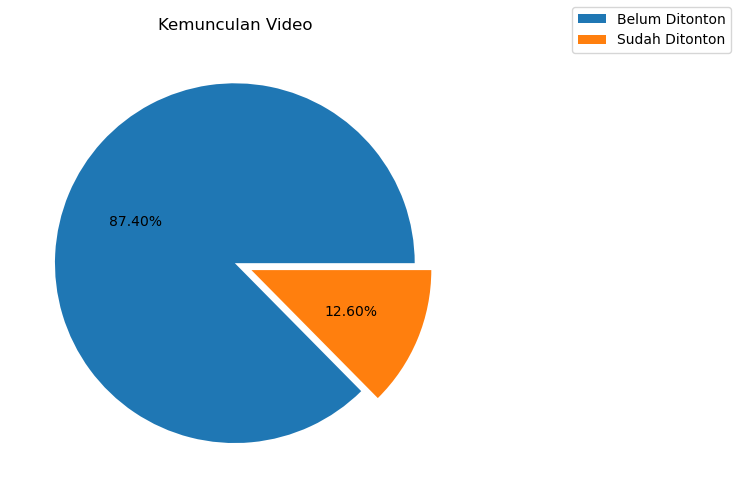

In [56]:
df_video['is_watch'] = df_video['video_id'].apply(lambda x: 'Sudah Ditonton' if x in (df_watch['video_id'].to_list()) else 'Belum Ditonton')

temp_df = pd.DataFrame(df_video[['is_watch']].value_counts()).reset_index()

temp_df['percentage'] = round(temp_df['count']/temp_df['count'].sum() *100,2)

explode = (0, 0.1)
fig, ax = plt.subplots(figsize=(10,5))
plt.title("Kemunculan Video")
ax.pie(temp_df['percentage'], explode=explode, autopct='%1.2f%%')
fig.legend(loc='outside upper right',labels=temp_df['is_watch'],)
plt.tight_layout()
plt.show()

Hanya 12% kemungkinan video yang pernah ditonton muncul kembali

### Pernah Menonton Video Dari Channel Yang Sama

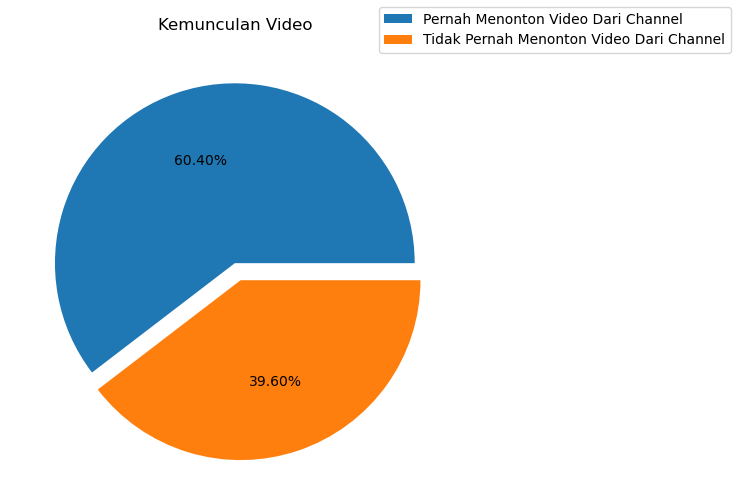

In [57]:
df_video['is_watch_other_video_from_the_channel'] = df_video['channel_name'].apply(lambda x: 'Pernah Menonton Video Dari Channel' if x in df_watch['channel_name'].to_list() else 'Tidak Pernah Menonton Video Dari Channel')

temp_df = pd.DataFrame(df_video[['is_watch_other_video_from_the_channel']].value_counts()).reset_index()

temp_df['percentage'] = round(temp_df['count']/temp_df['count'].sum() *100,2)

explode = (0, 0.1)
fig, ax = plt.subplots(figsize=(10,5))
plt.title("Kemunculan Video")
ax.pie(temp_df['percentage'], explode=explode, autopct='%1.2f%%')
fig.legend(loc='outside upper right',labels=temp_df['is_watch_other_video_from_the_channel'],)
plt.tight_layout()
plt.show()

60% kemungkinan video muncul kembali jika pernah menonton video lain dari channel yang sama

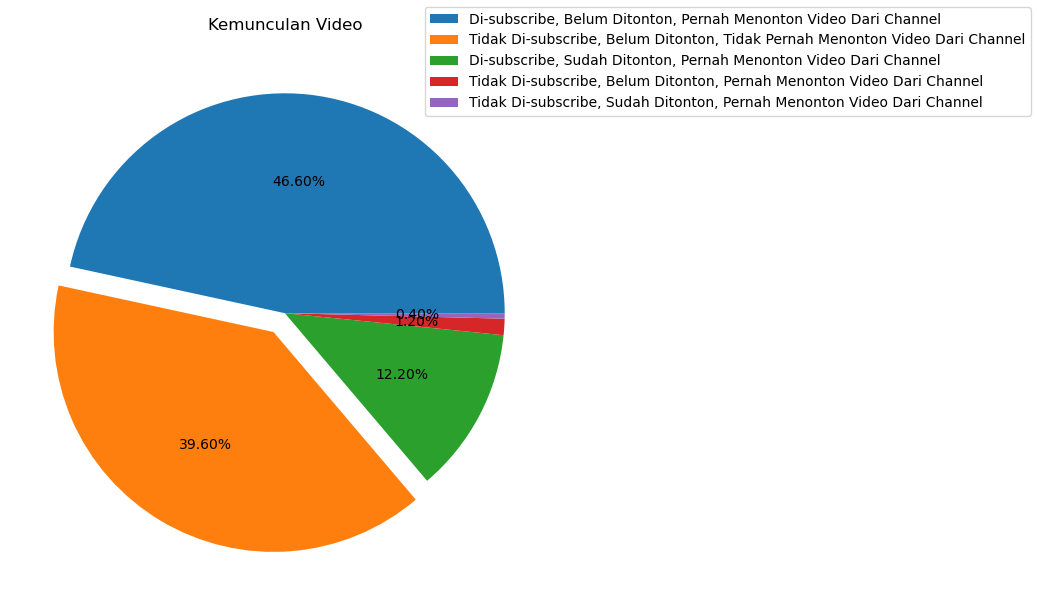

In [58]:
temp_df = df_video.copy()
temp_df['realtion'] = temp_df['is_subscribe'] + ', ' + temp_df['is_watch'] + ', ' + temp_df['is_watch_other_video_from_the_channel'] 
temp_df = pd.DataFrame(temp_df['realtion'].value_counts()).reset_index()
temp_df['percentage'] = round(temp_df['count']/temp_df['count'].sum() *100,2)

explode = (0, 0.1, 0, 0,0)
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Kemunculan Video")
ax.pie(temp_df['percentage'],explode=explode, autopct='%1.2f%%')
fig.legend(loc='outside upper right',labels=temp_df['realtion'],)
plt.tight_layout()
plt.show()

#### Conclutions
video dari channel yang telah disubscribe dan belum ditonton mendominasi sebesar 46%. Hanya 39% dari populasi sample video yang muncul pada home page youtube penulis.

### Memisahkan data
Hal ini bertujuan agar untuk melihat faktor apa saja yang berpengaruh pada algoritma yang bekerja pada home page untuk video (Tidak Di-subscribe, Belum Ditonton, Tidak Pernah Menonton Video Dari Channel

In [59]:
df_video = df_video.query('`is_subscribe`=="Tidak Di-subscribe" and `is_watch` == "Belum Ditonton" and `is_watch_other_video_from_the_channel`=="Tidak Pernah Menonton Video Dari Channel"').reset_index(drop=True)
df_video

,video_id,video_title,view_count,channel_name,channel_id,channel_url,time_record,video_tag,is_subscribe,is_watch,is_watch_other_video_from_the_channel
0,BkN_K-Px-Kw,The Wellerman Song and Drunken Sailor - Stormy...,265,Fenrir Music,UC-SR4l7G-X1Q_5e18QE1Wpg,/@FenrirAudioVisual,2024-03-18 23:32:23.757362,"'wellerman', 'drunken', 'sailor', 'sea', 'shan...",Tidak Di-subscribe,Belum Ditonton,Tidak Pernah Menonton Video Dari Channel
1,BkN_K-Px-Kw,The Wellerman Song and Drunken Sailor - Stormy...,265,Fenrir Music,UC-SR4l7G-X1Q_5e18QE1Wpg,/@FenrirAudioVisual,2024-03-18 23:32:23.757362,"'wellerman', 'drunken', 'sailor', 'sea', 'shan...",Tidak Di-subscribe,Belum Ditonton,Tidak Pernah Menonton Video Dari Channel
2,BkN_K-Px-Kw,The Wellerman Song and Drunken Sailor - Stormy...,272,Fenrir Music,UC-SR4l7G-X1Q_5e18QE1Wpg,/@FenrirAudioVisual,2024-03-18 23:32:23.757362,"'wellerman', 'drunken', 'sailor', 'sea', 'shan...",Tidak Di-subscribe,Belum Ditonton,Tidak Pernah Menonton Video Dari Channel
3,yM9nzbzJNec,Sousou no Frieren Ep. 27 Emotional OST- Flower...,7036,TaeIn Kim Music,UCO-CX5f2TOpRxeoi0Xi9C1A,/channel/UCO-CX5f2TOpRxeoi0Xi9C1A,2024-03-18 23:32:23.757362,"'sousou', 'sousou', 'no', 'frieren', 'frieren'...",Tidak Di-subscribe,Belum Ditonton,Tidak Pernah Menonton Video Dari Channel
4,ztMUisLKFME,Takina Inoue AI Cover - Boulevard of Broken Dr...,88,The Five Skidderators,UCrcxVXVvJfLGKkx0tabhPRw,/@TheFiveSkidderators,2024-03-18 23:32:23.757362,"'music', 'takina', 'inoue', 'takina', 'ai', 'c...",Tidak Di-subscribe,Belum Ditonton,Tidak Pernah Menonton Video Dari Channel
...,...,...,...,...,...,...,...,...,...,...,...
193,yM9nzbzJNec,Sousou no Frieren Ep. 27 Emotional OST- Flower...,7194,TaeIn Kim Music,UCO-CX5f2TOpRxeoi0Xi9C1A,/channel/UCO-CX5f2TOpRxeoi0Xi9C1A,2024-03-18 23:32:23.757362,"'sousou', 'sousou', 'no', 'frieren', 'frieren'...",Tidak Di-subscribe,Belum Ditonton,Tidak Pernah Menonton Video Dari Channel
194,KO5Ky6KpxDc,Unleash Your Imagination : Epic Orchestra Bliss,166,music space for you,UCnZ8GonUOCiFX4jcjY5QJDA,/@musicspaceforyou-bi6ke,2024-03-18 23:32:23.757362,"'powerful', 'orchestral', 'music', 'epic', 'ba...",Tidak Di-subscribe,Belum Ditonton,Tidak Pernah Menonton Video Dari Channel
195,LwLHttdqGsc,Frieren: Beyond Journey's End - Episode 27 [En...,278731,Muse Asia,UCGbshtvS9t-8CW11W7TooQg,/@MuseAsia,2024-03-18 23:32:23.757362,NaN,Tidak Di-subscribe,Belum Ditonton,Tidak Pernah Menonton Video Dari Channel
196,F4lTTdu5Euw,MAGIC CAN BE BEAUTIFUL 🌸 I Frieren: Beyond Jo...,108,Drawingkee,UCayykaPKkS6xwa9hKyUHtWw,/@Drawingkee,2024-03-18 23:32:23.757362,"'anime', 'anime', 'reaction', 'drawingkee', 'd...",Tidak Di-subscribe,Belum Ditonton,Tidak Pernah Menonton Video Dari Channel


### Korelasi Views Dan Jumlah Kemunculan
Melihat apakah views memiliki pengaruh pada jumlah kemunculan video pada home page

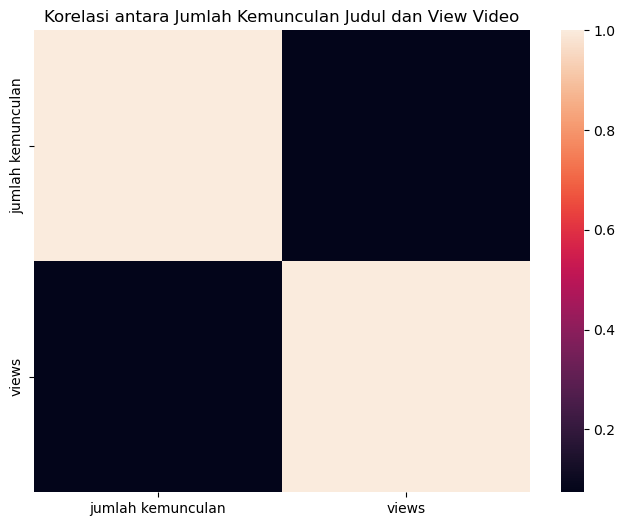

In [60]:
temp_df = pd.DataFrame(df_video[['video_title','video_id']].value_counts()).reset_index()
temp_df.rename(columns={"count": "jumlah kemunculan"},inplace=True)
#temp_df['views'] = temp_df['video_id'].apply(lambda x: df_video.loc[df['video_id']==x,'view_count'])
temp_df['views'] = temp_df['video_id'].apply(lambda x: round(df_video.loc[df_video['video_id']==x,'view_count'].mean()))
temp_df
plt.figure(figsize=(8, 6))  # Adjust width and height as desired

# Create the heatmap
ax = sns.heatmap(data=temp_df[['jumlah kemunculan','views']].corr())

# Add title to the heatmap
ax.set_title("Korelasi antara Jumlah Kemunculan Judul dan View Video")  # Set your desired title here

plt.show()

#### Conclution
Dari bagan diatas dapat disimpulkan bahwa jumlah views tidak mempengaruhi jumlah kemunculan video pada home page

### Komposisi Query Pada Judul Dan Tag Video Yang Muncul

In [61]:
query_list = pd.Series(re.findall(r'[\w]+',str(df_search['title'].to_list()))).unique()# mengabil unique query sebagai list

def get_query_in_string(x:str,y):
    if x is None or pd.isna(x):
        return None
    else:
        x = x.lower()
        temp_list = []
        for i in y:
            if i in x:
                temp_list.append(i)
        if len(temp_list)>0:
            return temp_list
        else:
            return None

df_video['title_query_contain'] = df_video['video_title'].apply(lambda x: get_query_in_string(x=x,y=query_list))
df_video['tag_query_contain'] = df_video['video_tag'].apply(lambda x: get_query_in_string(x=x,y=query_list))

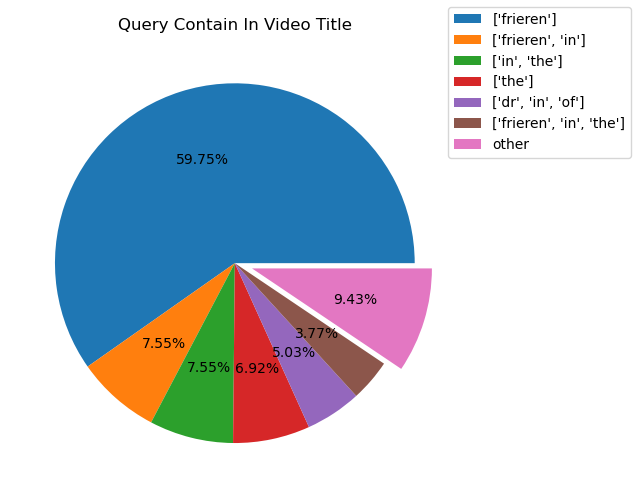

In [62]:
temp_df = pd.DataFrame(df_video['title_query_contain'].value_counts()).reset_index()
temp_df['percentage'] = temp_df['count']/temp_df['count'].sum() *100
total = temp_df['count'].sum()
temp_df = temp_df.loc[:6]
temp_df['title_query_contain'].loc[6] = 'other'
temp_df['count'].loc[6] = total - temp_df['count'].sum()
temp_df['percentage'].loc[6] = temp_df['count'].loc[6]/total*100
explode = []
for i in range(len(temp_df)):
    if i == len(temp_df)-1:
        explode.append(0.1)
    else:
        explode.append(0)


fig, ax = plt.subplots(figsize=(8,5))
plt.title(f"Query Contain In Video Title")
ax.pie(temp_df['percentage'],explode=explode, autopct='%1.2f%%')

fig.legend(loc='outside upper right',labels=temp_df['title_query_contain'],)
plt.tight_layout()
plt.show()

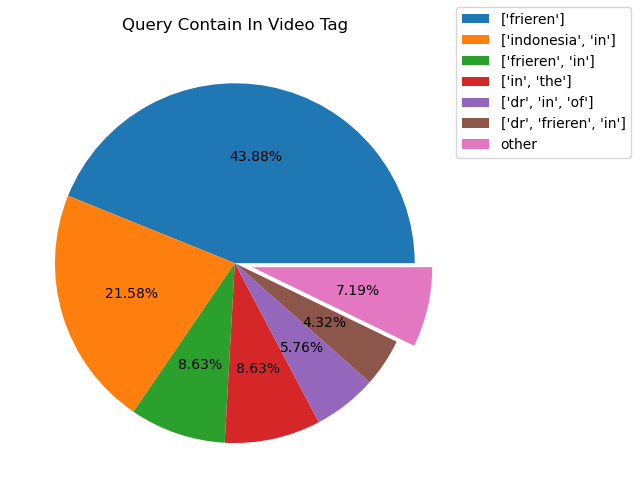

In [63]:
temp_df = pd.DataFrame(df_video['tag_query_contain'].value_counts()).reset_index()
temp_df['percentage'] = temp_df['count']/temp_df['count'].sum() *100
total = temp_df['count'].sum()
temp_df = temp_df.loc[:6]
temp_df['tag_query_contain'].loc[6] = 'other'
temp_df['count'].loc[6] = total - temp_df['count'].sum()
temp_df['percentage'].loc[6] = temp_df['count'].loc[6]/total*100
explode = []
for i in range(len(temp_df)):
    if i == len(temp_df)-1:
        explode.append(0.1)
    else:
        explode.append(0)


fig, ax = plt.subplots(figsize=(8,5))
plt.title(f"Query Contain In Video Tag")
ax.pie(temp_df['percentage'],explode=explode, autopct='%1.2f%%')

fig.legend(loc='outside upper right',labels=temp_df['tag_query_contain'],)
plt.tight_layout()
plt.show()

#### Conclution

dari bagan diatas diketahui bahwa query pencarian 'frieren' mendominasi pada 'title' dan 'tag' di seluruh video yang muncul pada home page.

### Komposisi Query 'frieren' Pada Judul Dan Tag Video Pada Riwayat Tontonan

In [83]:
df_watch['is_frieren_in_title'] = df_watch['title'].str.contains(pat='frieren',case=False)
df_watch['is_frieren_in_tag'] = df_watch['video_tag'].str.contains(pat='frieren',case=False)

df_watch['is_frieren_in_title'].replace({True:'Ada Queri Di Judul',False:'Tidak Ada Queri Di Judul'},inplace=True)
df_watch['is_frieren_in_tag'].replace({True:'Ada Queri Di Tag',False:'Tidak Ada Queri Di Tag'},inplace=True)

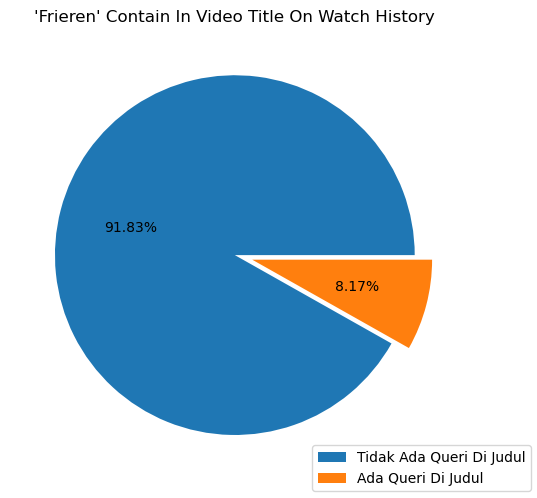

In [85]:
temp_df = pd.DataFrame(df_watch['is_frieren_in_title'].loc[:].value_counts()).reset_index()
total = temp_df['count'].sum()
temp_df['percentage'] = temp_df['count']/total *100

explode = []
for i in range(len(temp_df)):
    if i == len(temp_df)-1:
        explode.append(0.1)
    else:
        explode.append(0)
fig, ax = plt.subplots(figsize=(6,5))
plt.title(f"'Frieren' Contain In Video Title On Watch History")
ax.pie(temp_df['percentage'],explode=explode, autopct='%1.2f%%')

fig.legend(loc='outside lower right',labels=temp_df['is_frieren_in_title'],)
plt.tight_layout()
plt.show()

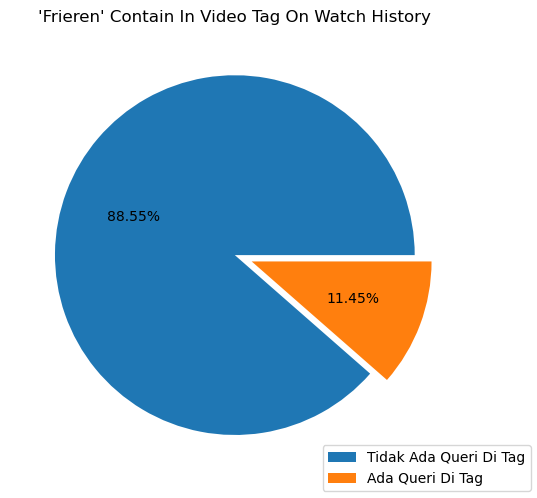

In [86]:
temp_df = pd.DataFrame(df_watch['is_frieren_in_tag'].loc[:].value_counts()).reset_index()
total = temp_df['count'].sum()
temp_df['percentage'] = temp_df['count']/total *100
explode = []
for i in range(len(temp_df)):
    if i == len(temp_df)-1:
        explode.append(0.1)
    else:
        explode.append(0)
fig, ax = plt.subplots(figsize=(6,5))
plt.title(f"'Frieren' Contain In Video Tag On Watch History")
ax.pie(temp_df['percentage'],explode=explode, autopct='%1.2f%%')

fig.legend(loc='outside lower right',labels=temp_df['is_frieren_in_tag'],)
plt.tight_layout()
plt.show()

#### Conclutions
query 'frieren' ternyata tidak mendominasi pada seluruh riwayat tontonan penulis

### Kandungan Query Riwayat Tontonan Pada Tanggal Yang Berbeda

#### Title

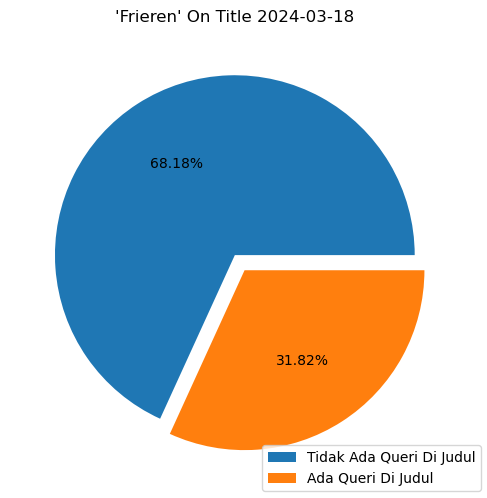

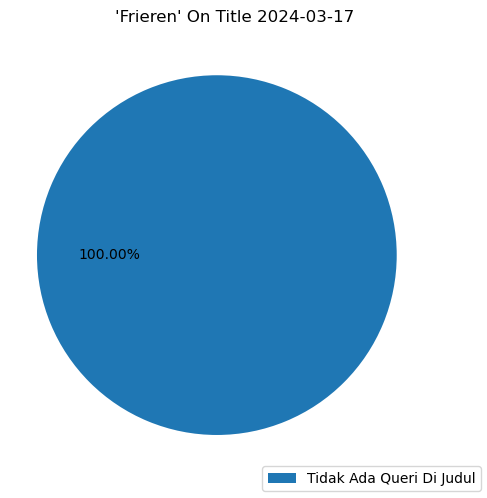

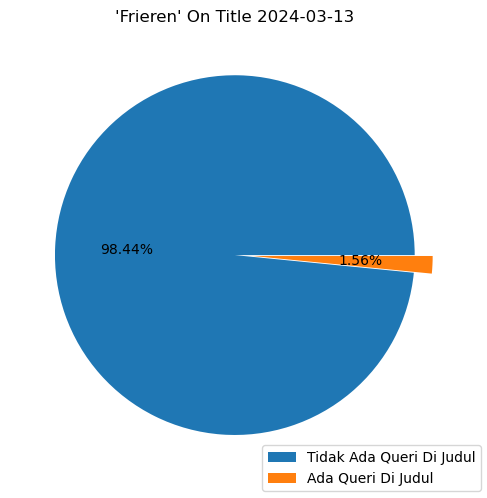

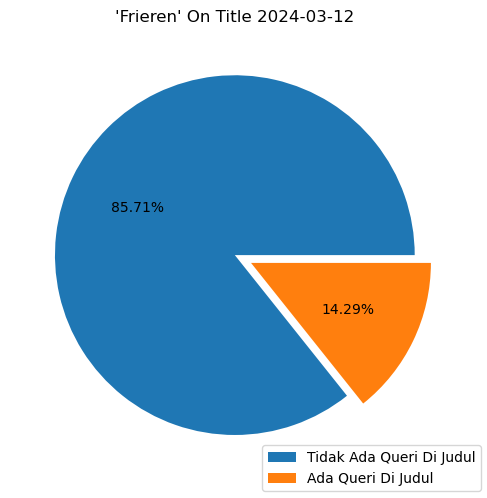

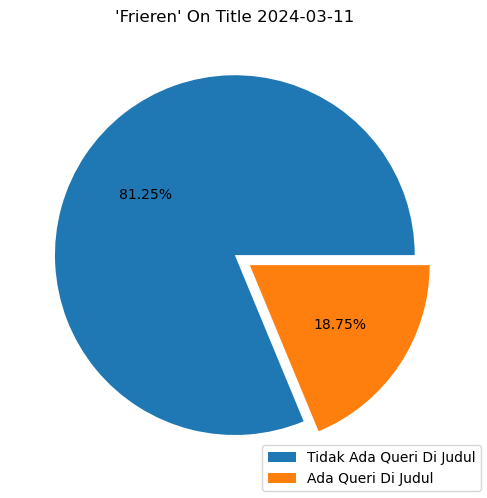

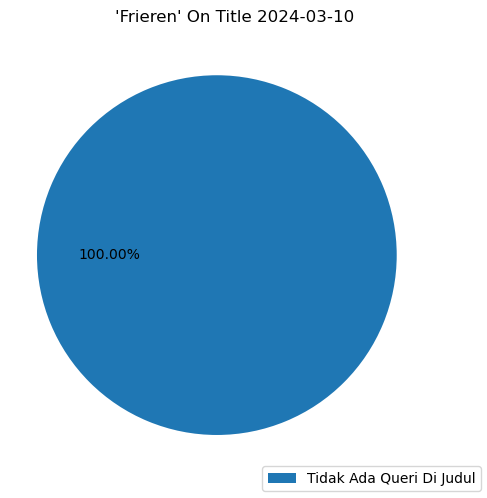

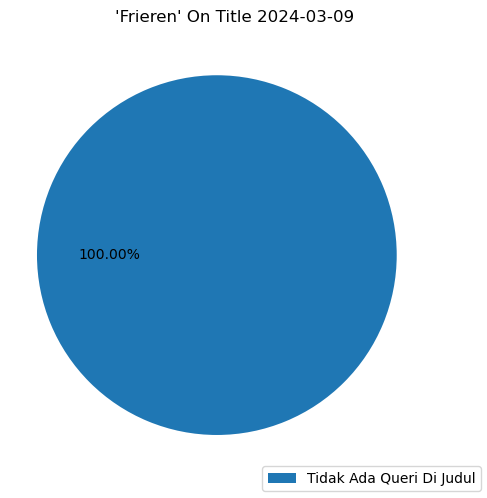

In [90]:
for i in df_watch['time_truncate'].unique():
    title = str(i)
    temp_df = pd.DataFrame(df_watch['is_frieren_in_title'].loc[df_watch['time_truncate']==i].value_counts()).reset_index()
    total = temp_df['count'].sum()
    temp_df['percentage'] = temp_df['count']/total *100

    explode = []
    for i in range(len(temp_df)):
        if i == len(temp_df)-1:
            explode.append(0.1)
        else:
            explode.append(0)
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(f"'Frieren' On Title {title}")
    ax.pie(temp_df['percentage'],explode=explode, autopct='%1.2f%%')

    fig.legend(loc='outside lower right',labels=temp_df['is_frieren_in_title'],)
    plt.tight_layout()
    plt.show()

### Tag

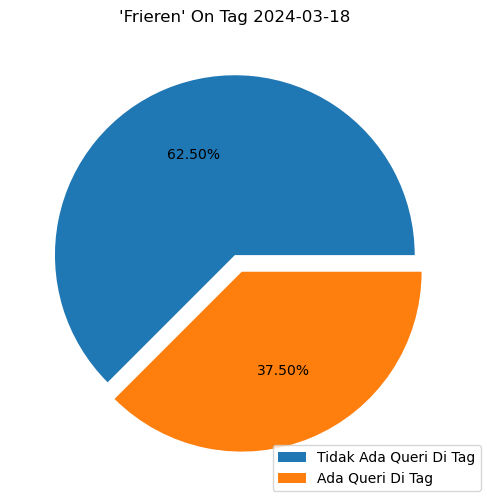

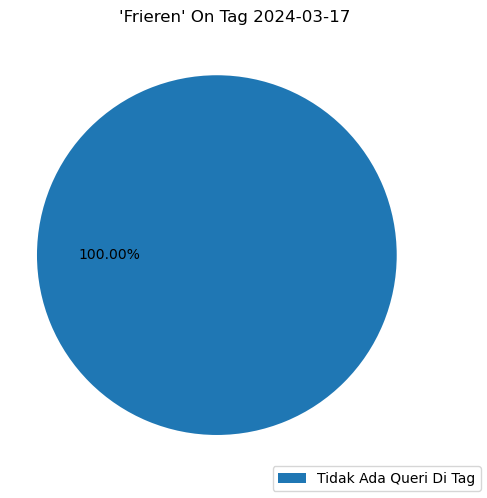

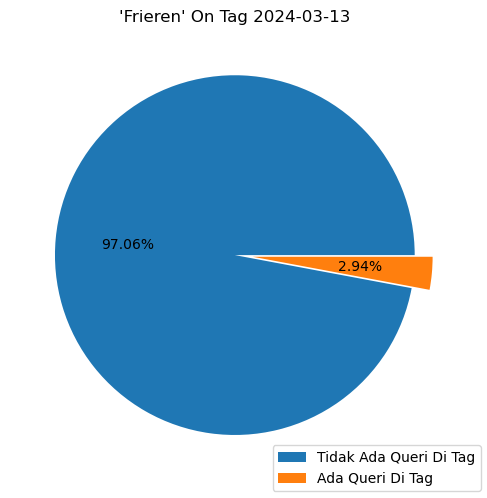

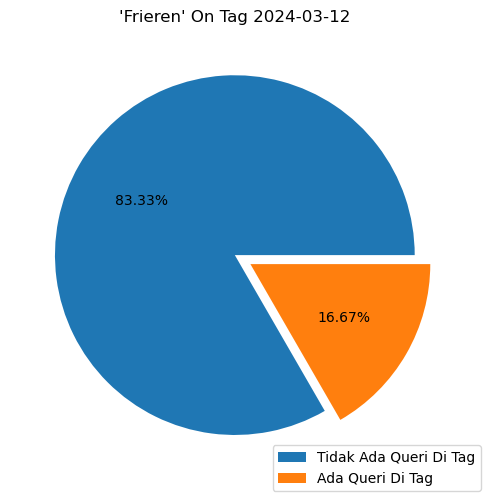

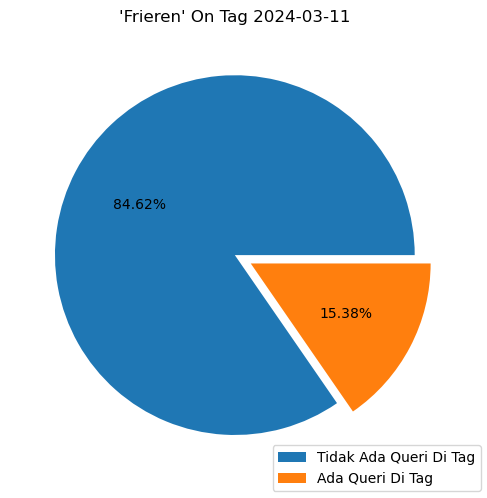

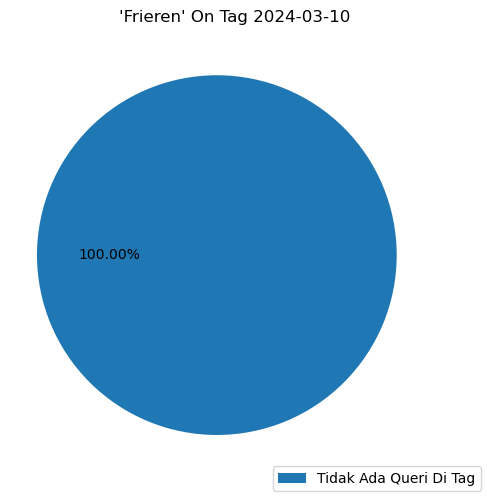

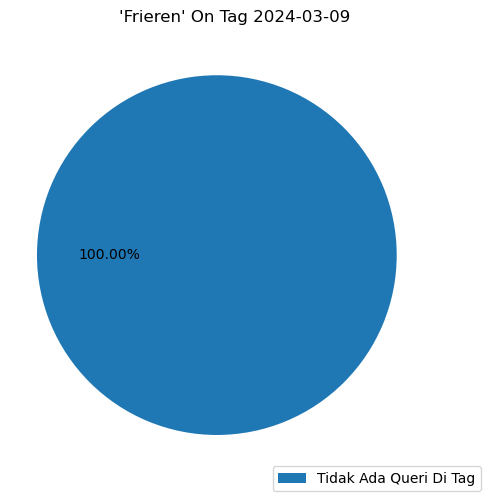

In [91]:
for i in df_watch['time_truncate'].unique():
    title = str(i)
    temp_df = pd.DataFrame(df_watch['is_frieren_in_tag'].loc[df_watch['time_truncate']==i].value_counts()).reset_index()
    total = temp_df['count'].sum()
    temp_df['percentage'] = temp_df['count']/total *100

    explode = []
    for i in range(len(temp_df)):
        if i == len(temp_df)-1:
            explode.append(0.1)
        else:
            explode.append(0)
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(f"'Frieren' On Tag {title}")
    ax.pie(temp_df['percentage'],explode=explode, autopct='%1.2f%%')

    fig.legend(loc='outside lower right',labels=temp_df['is_frieren_in_tag'],)
    plt.tight_layout()
    plt.show()


### Menggabungkan 'is_frieren_in_title' dan 'is_frieren_in_tag' untuk melihat data keseluruhan dengan mudah

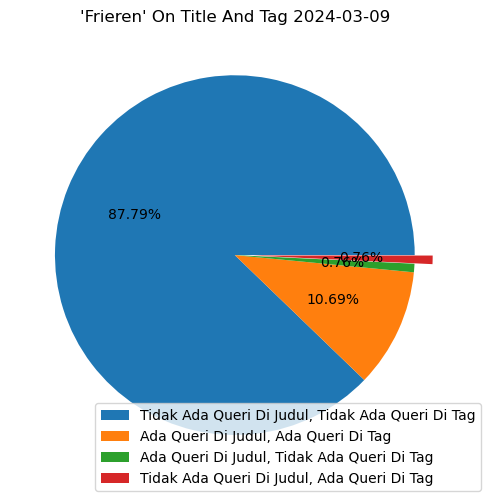

In [96]:
df_watch['interaction'] = df_watch['is_frieren_in_title']+', '+df_watch['is_frieren_in_tag']
temp_df = pd.DataFrame(df_watch['interaction'].value_counts()).reset_index()
temp_df['percentage'] = temp_df['count']/total *100

explode = []
for i in range(len(temp_df)):
    if i == len(temp_df)-1:
        explode.append(0.1)
    else:
        explode.append(0)
fig, ax = plt.subplots(figsize=(5,5))
plt.title(f"'Frieren' On Title And Tag {title}")
ax.pie(temp_df['percentage'],explode=explode, autopct='%1.2f%%')

fig.legend(loc='outside lower right',labels=temp_df['interaction'],)
plt.tight_layout()
plt.show()

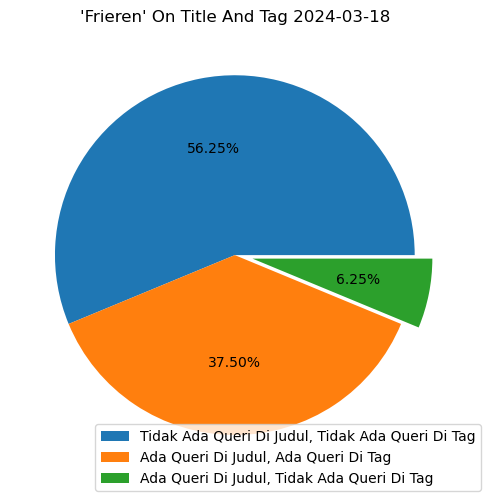

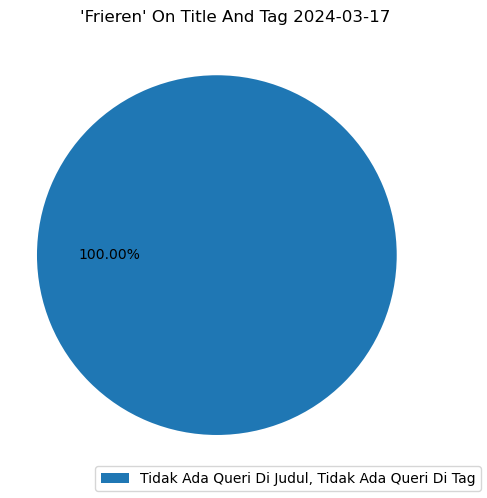

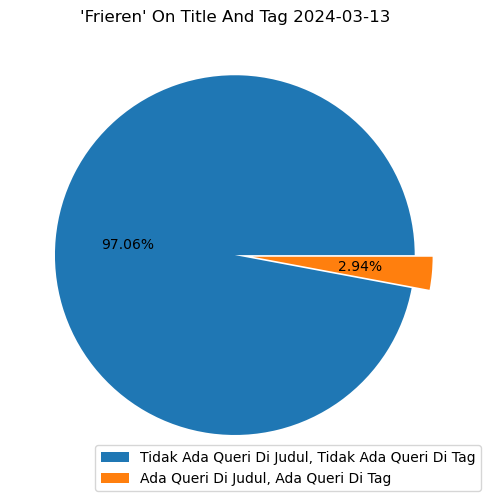

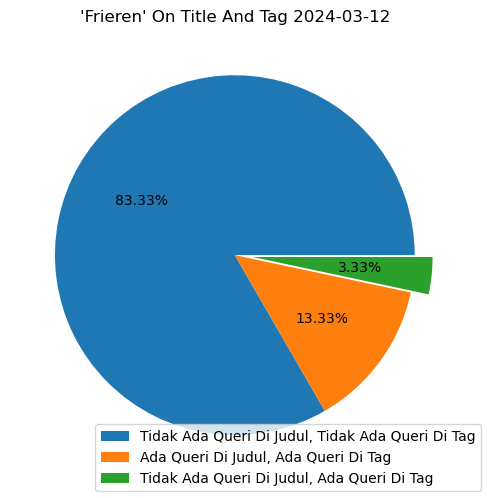

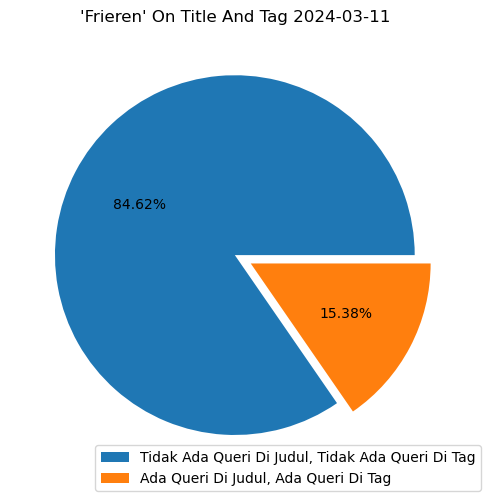

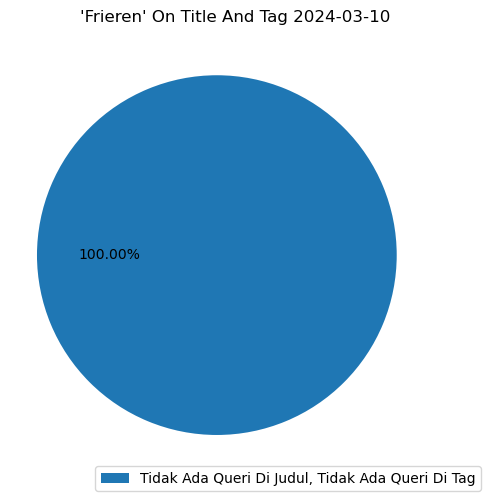

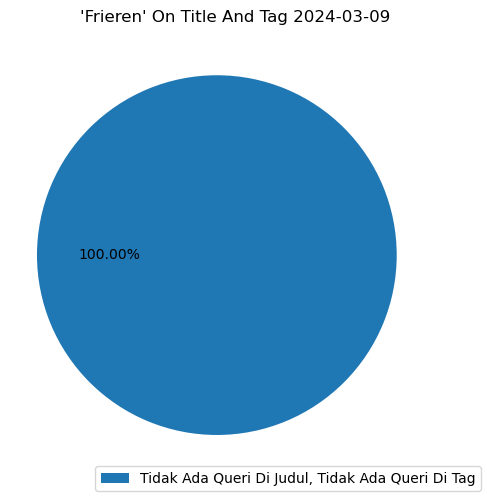

In [107]:
for i in df_watch['time_truncate'].unique():
    title = str(i)
    temp_df = pd.DataFrame(df_watch['interaction'].loc[df_watch['time_truncate']==i].value_counts()).reset_index()
    total = temp_df['count'].sum()
    temp_df['percentage'] = temp_df['count']/total *100

    explode = []
    for i in range(len(temp_df)):
        if i == len(temp_df)-1:
            explode.append(0.1)
        else:
            explode.append(0)
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(f"'Frieren' On Title And Tag {title}")
    ax.pie(temp_df['percentage'],explode=explode, autopct='%1.2f%%')

    fig.legend(loc='outside lower right',labels=temp_df['interaction'],)
    plt.tight_layout()
    plt.show()

### Query Yang Terkandung Pada Judul Dan Tag Pada 1 Hari Terakhir Riwayat Tontonan

In [98]:
df_watch['title_query_contain'] = df_watch['title'].apply(lambda x: get_query_in_string(x=x,y=query_list))
df_watch['tag_query_contain'] = df_watch['video_tag'].apply(lambda x: get_query_in_string(x=x,y=query_list))

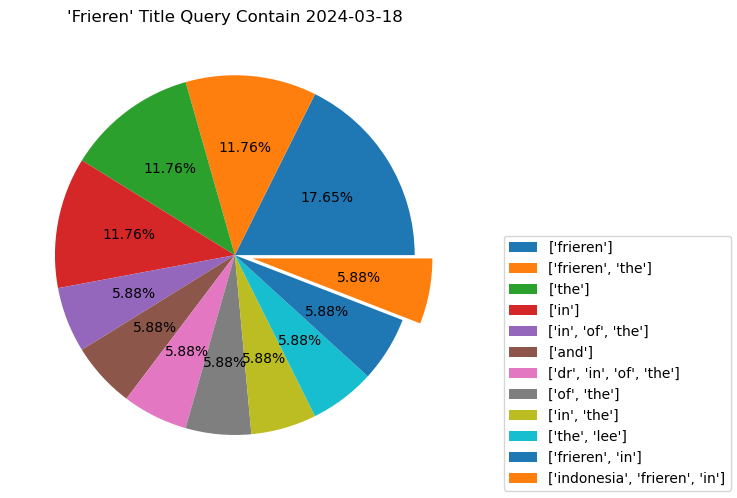

In [103]:
title = str(df_watch['time_truncate'].max())
temp_df = pd.DataFrame(df_watch['title_query_contain'].loc[df_watch['time_truncate']==title].value_counts()).reset_index()
total = temp_df['count'].sum()
temp_df['percentage'] = temp_df['count']/total *100

explode = []
for i in range(len(temp_df)):
    if i == len(temp_df)-1:
        explode.append(0.1)
    else:
        explode.append(0)
fig, ax = plt.subplots(figsize=(10,5))
plt.title(f"'Frieren' Title Query Contain {title}")
ax.pie(temp_df['percentage'],explode=explode, autopct='%1.2f%%')

fig.legend(loc='outside lower right',labels=temp_df['title_query_contain'],)
plt.tight_layout()
plt.show()

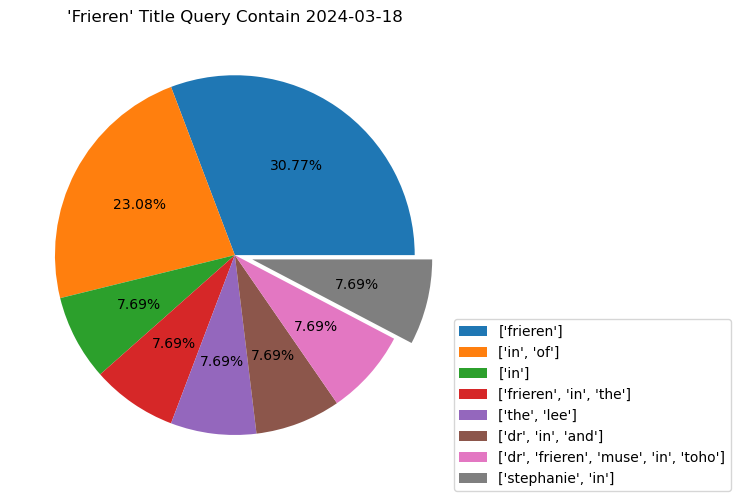

In [104]:
title = str(df_watch['time_truncate'].max())
temp_df = pd.DataFrame(df_watch['tag_query_contain'].loc[df_watch['time_truncate']==title].value_counts()).reset_index()
total = temp_df['count'].sum()
temp_df['percentage'] = temp_df['count']/total *100

explode = []
for i in range(len(temp_df)):
    if i == len(temp_df)-1:
        explode.append(0.1)
    else:
        explode.append(0)
fig, ax = plt.subplots(figsize=(10,5))
plt.title(f"'Frieren' Title Query Contain {title}")
ax.pie(temp_df['percentage'],explode=explode, autopct='%1.2f%%')

fig.legend(loc='outside lower right',labels=temp_df['tag_query_contain'],)
plt.tight_layout()
plt.show()

#### Conclutions
- Komposisi queri pada hari terakhir pada riwayat tontonan yang memiliki query 'frieren' cukup besar pada 'title' dan 'tag', meskipun tidak mendominasi.


## Final Conclution
- Penggunaan query yang sering dicari oleh penonton pada judul maupun tag video dapat meningkatkan kemungkinan video muncul pada awal home page pengguna pada urutan 1-5, yang mana memiliki peluang terbesar untuk click rate.
- Cara kerja algoritma youtube berdasarkan behavior pengguna yang diambil berdasarkan riwayat pencarian query/kata kunci dan riwayat tontonan.

